In [ ]:
# import library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


In [322]:
# setting difference to be 4

df = pd.read_csv(r'C:\Users\masud\Documents\Steel-Project\Final_4.5.csv')
df.head()

,Unnamed: 0,coil,furnace Number,analyse,Hardness_1,Hardness_2,Width,Temperature before finishing mill,Temperature after finishing mill,Thickness,...,al,ma,b,n,ti,cr,va,mo,difference,constriction
0,0,396378,1,K371,10003,101,1302.1,1147,921,4.36,...,304,291,1,34,6,302,0,25,-0.783333,0
1,1,396376,3,K371,10123,101,1282.3,1150,920,4.37,...,395,384,1,33,12,189,25,7,-0.300000,0
2,2,396377,4,K321,10040,102,1297.4,1183,933,4.43,...,476,463,1,20,11,288,0,40,-1.866667,0
3,3,396379,3,K371,10243,102,1295.2,1165,910,4.44,...,306,296,1,21,9,253,0,9,-0.166667,0
4,4,396380,4,K321,10012,100,1293.3,1192,909,3.95,...,340,329,1,28,8,297,0,23,-0.800000,0


In [323]:
# drop column
df = df.drop(['Unnamed: 0','Thickness profile','difference'], axis = 1)

#df

In [324]:
# remove all zero 
df = df.loc[df.Hardness_1 * df.Hardness_2 * df.Width * df.Thickness * df['Temperature before finishing mill'] * df['Temperature after finishing mill'] != 0]


In [325]:
# Downsampling 

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler


In [326]:
#Extracting independent variable
X= df.iloc[:,4:-1]
X

,Hardness_2,Width,Temperature before finishing mill,Temperature after finishing mill,Thickness,c,mn,si,nb,p,s,al,ma,b,n,ti,cr,va,mo
0,101,1302.1,1147,921,4.36,355,2162,49,0,133,143,304,291,1,34,6,302,0,25
1,101,1282.3,1150,920,4.37,551,1985,101,0,118,90,395,384,1,33,12,189,25,7
2,102,1297.4,1183,933,4.43,457,1895,60,0,108,115,476,463,1,20,11,288,0,40
3,102,1295.2,1165,910,4.44,697,2008,69,0,139,98,306,296,1,21,9,253,0,9
4,100,1293.3,1192,909,3.95,477,1936,52,0,112,121,340,329,1,28,8,297,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55764,99,1257.3,1183,913,3.27,425,2264,58,0,97,160,389,339,1,26,7,199,0,30
55765,100,1256.6,1180,922,2.68,425,2283,60,0,93,160,405,379,1,24,7,194,0,30
55766,99,1257.2,1182,919,2.68,357,2076,99,0,92,159,334,324,1,26,8,248,0,36
55767,99,1257.1,1194,923,2.68,357,2076,99,0,92,159,334,324,1,26,8,248,0,36


In [327]:
#Extracting dependent variable
y= df.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
55764    0
55765    1
55766    0
55767    0
55768    1
Name: constriction, Length: 54945, dtype: int64

In [328]:
#For splitting the dataset, 

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)  

In [329]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X_train,  y_train)
# summarize class distribution
print(Counter(y_over))

Counter({0: 3831, 1: 3831})


In [ ]:
# feature scaling:standarding the dataset

from sklearn.preprocessing import StandardScaler 

# fitting  and transforming the training dataset.

st_x= StandardScaler()  
X_over= st_x.fit_transform(X_over)

In [330]:
# fitting  and transforming the test dataset
X_test= st_x.transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
X_over = scaler.fit_transform(X_over)
X_test = scaler.transform(X_test)

# Building Different Model

# 1. Decision Tree using Pipeline library


In [332]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier

# define pipeline
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

# Decision Tree using sklearn.tree library

In [334]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
decison_model = clf_model.fit(X_over,y_over)

In [335]:
#Testing the model
y_predict = decison_model.predict(X_test)

In [ ]:
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(decison_model, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

# Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_predict)

print(cf_matrix)

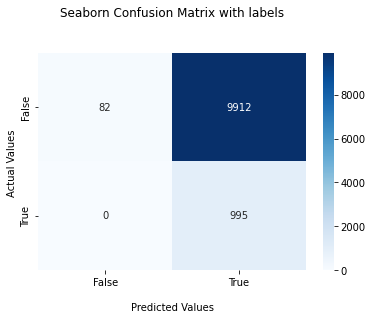

In [338]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, 
            fmt='g', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


# 2. Random Forest using Pipeline library


In [339]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier

# define pipeline
steps = [('under', RandomUnderSampler()), ('model', RandomForestClassifier())]
pipeline = Pipeline(steps=steps)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier(n_estimators = 300, max_depth = 7, random_state =42, class_weight= "balanced_subsample")
model.fit(X_over, y_over)

prediction = model.predict(X_test)
prediction


In [ ]:
# evaluate of the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, prediction)

print(cf_matrix)

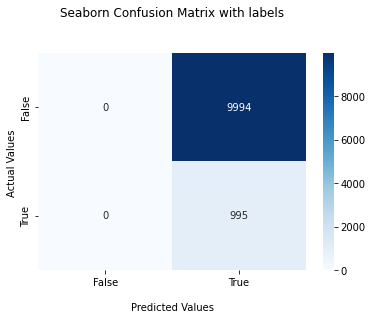

In [344]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, 
            fmt='g', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Feature importance 


In [345]:
# Checking the feature importance
feature_importances = pd.DataFrame(model.feature_importances_, index =X.columns,  columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(10)

,importance
Thickness,0.204943
mn,0.139340
c,0.081002
Width,0.079068
si,0.075654
cr,0.070605
nb,0.061971
Hardness_2,0.060922
s,0.041646
b,0.039773


# Test model based on Selection of features importance

In [ ]:
#Extracting independent variable
X_di = df.iloc[["Thickness","mn","c","Width","si","cr","nb","Hardness_2"]]

In [347]:
#Extracting dependent variable
y_di= df.iloc[:,-1]

# Downnsampling 

In [ ]:
#For splitting the dataset, 

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)  

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X_train,  y_train)
# summarize class distribution
print(Counter(y_over))


In [ ]:
# feature scaling:standarding the dataset

from sklearn.preprocessing import StandardScaler 

# fitting  and transforming the training dataset.

st_x= StandardScaler()  
X_over= st_x.fit_transform(X_over)

In [ ]:
# fitting  and transforming the test dataset
X_test= st_x.transform(X_test)

from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
X_over = scaler.fit_transform(X_over)
X_test = scaler.transform(X_test)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
decison_model = clf_model.fit(X_over,y_over)

#Testing the model
y_predict = decison_model.predict(X_test)

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(decison_model, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

# Confusion matrix for Decision_Trees

In [350]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_predict)

print(cf_matrix)

[[  82 9912]
 [   0  995]]


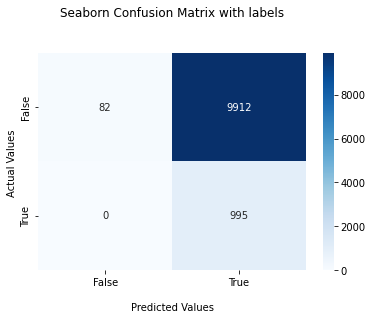

In [351]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, 
            fmt='g', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier(n_estimators = 300, max_depth = 7, random_state =42, class_weight= "balanced_subsample")
model.fit(X_over, y_over)

prediction = model.predict(X_test)
prediction


In [ ]:
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_di, y_di, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.797


In [353]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test,prediction)

print(cf_matrix)

[[   0 9994]
 [   0  995]]


In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, 
          fmt='g',   cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

